<a href="https://colab.research.google.com/github/strathpaulkirkland/DM996/blob/master/Ultrasound_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'ultrasuite-tools' already exists and is not an empty directory.


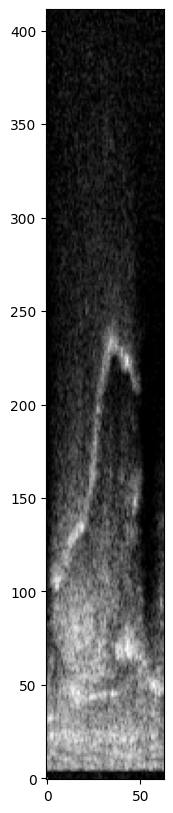

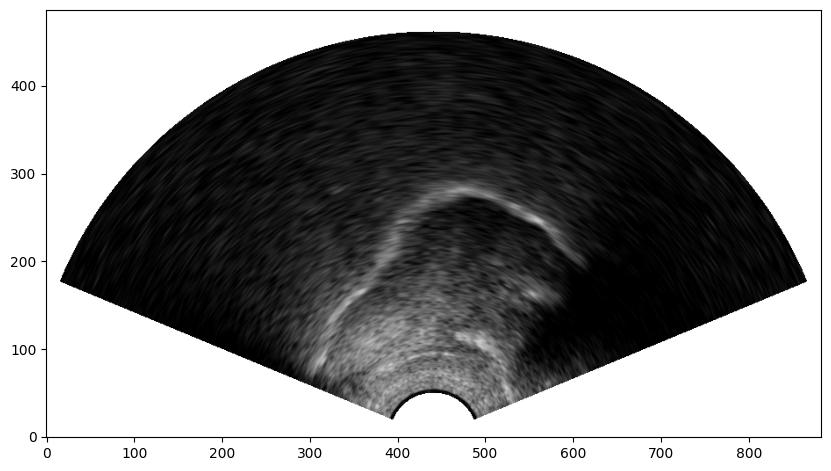

In [ ]:
# !pip install numpy scipy matplotlib
!git clone https://github.com/UltraSuite/ultrasuite-tools.git
import sys
sys.path.append('/content/ultrasuite-tools')

import numpy as np
import os
from ustools.read_core_files import parse_parameter_file, read_ultrasound_file
from ustools.visualise_ultrasound import display_2d_ultrasound_frame
from ustools.transform_ultrasound import transform_ultrasound

# Path to the sample data in the UltraSuite repository
input_path = "/content/ultrasuite-tools/input"
file = "sample"

param_filename = os.path.join(input_path, file + ".param")
ult_filename = os.path.join(input_path, file + ".ult")

# Parse the parameter file
param_df = parse_parameter_file(param_filename)

# Read the ultrasound file
ult = read_ultrasound_file(ult_filename)

# Reshape the ultrasound data
ult_3d = ult.reshape(-1, int(param_df['NumVectors'].value), int(param_df['PixPerVector'].value))

# Visualize the 100th frame of the raw ultrasound data
ult_100th_frame = ult_3d[100]
display_2d_ultrasound_frame(ult_100th_frame, dpi=None, figsize=(10,10))

# Transform the ultrasound data from raw to world coordinates
world_ult_100th_frame = transform_ultrasound(ult_100th_frame)
display_2d_ultrasound_frame(world_ult_100th_frame[0], dpi=None, figsize=(10,10))
